## Data Scrapping with Beautiful Soup

In [25]:
# imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Fetch the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_universities_in_Nigeria"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [3]:
# Find the tables
tables = soup.find_all("table", class_="wikitable")

In [4]:
# Initialize lists to store the data
names = []
states = []
abbreviations = []
locations = []
funding = []
founded = []

In [5]:
# Loop through the tables and extract the data
for table in tables:
    rows = table.find_all("tr")
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all("td")
        if len(cols) >= 6:
            names.append(cols[0].text.strip())
            states.append(cols[1].text.strip())
            abbreviations.append(cols[2].text.strip())
            locations.append(cols[3].text.strip())
            funding.append(cols[4].text.strip())
            founded.append(cols[5].text.strip())

In [6]:
# Create the DataFrame
df = pd.DataFrame({
    "Name": names,
    "State": states,
    "Abbreviation": abbreviations,
    "Location": locations,
    "Funding": funding,
    "Founded": founded
})

## Data Exploration

In [8]:
# Print the DataFrame
df.head()

,Name,State,Abbreviation,Location,Funding,Founded
0,Abubakar Tafawa Balewa University,Bauchi.,ATBU,Bauchi,Federal,1980
1,Ahmadu Bello University,Kaduna.[6],ABU,Zaria,Federal,1962
2,Alex Ekwueme Federal University Ndufu Alike Ikwo,Ebonyi,AE-FUNAI,Ikwo,Federal,2011
3,Bayero University,Kano,BUK,Kano,Federal,1977
4,"Federal University of Agriculture, Abeokuta",Ogun,FUNAAB,Abeokuta,Federal,1988


In [9]:
df.shape

(190, 6)

- There are 190 universities in Nigeria as of today 11th June 2024 on Wikioaedia
- This data set has 6 columns; the name, location (State or city in state), the name abbreviation, who funds the uni and the year of funding

In [10]:
df.columns

Index(['Name', 'State', 'Abbreviation', 'Location', 'Funding', 'Founded'], dtype='object')

In [11]:
df.Location.unique()

array(['Bauchi', 'Zaria', 'Ikwo', 'Kano', 'Abeokuta', 'Birnin Kebbi',
       'Dutse', 'Dutsin-Ma', 'Gashua', 'Gusau', 'Kashere', 'Lokoja',
       'Lafia', 'Effurun', 'Akure', 'Minna', 'Owerri', 'Otuoke',
       'Oye-Ekiti', 'Wukari', 'Umudike', 'Yola', 'Victoria Island',
       'Awka', 'Ile Ife', 'Gwagwalada', 'Makurdi', 'Benin City',
       'Calabar', 'Ibadan', 'Ilorin', 'Jos', 'Akoka', 'Maiduguri',
       'Nsukka', 'Port Harcourt', 'Uyo', 'Ikot-Abasi', 'Sokoto', 'Uturu',
       'Mubi', 'Akungba-Akoko', 'Wudil', 'Ekpoma', 'Gadau', 'Yenagoa',
       'Damaturu', 'Uli', 'Ekpo-Abasi, Calabar', 'Abraka', 'Ozoro',
       'Asaba', 'Abakaliki', 'Iyamho', 'Ado Ekiti', 'Enugu', 'Gombe',
       'Kumo', 'Lapai', 'Kaduna', 'Aliero', 'Anyigba', 'Malete',
       'Ogbomoso', 'Ojo', 'Ijanikin', 'Ikorodu', 'Keffi', 'Amassoma',
       'Ago-Iwoye', 'Okitipupa', 'Osogbo', 'Bokkos', 'Kafin-Hausa',
       'Ijebu Ode', 'Jalingo', 'Katsina', 'Agbor', 'Talata Mafara',
       'Warri', 'Biu', 'Owo', 'Ede', 'Ado-

In [80]:
df.duplicated().sum()

0

In [12]:
# Sample DataFrame with Location column
data = {
    'Location': ['Bauchi', 'Zaria', 'Ikwo', 'Kano', 'Abeokuta', 'Birnin Kebbi', 'Dutse', 'Dutsin-Ma', 
                 'Gashua', 'Gusau', 'Kashere', 'Lokoja', 'Lafia', 'Effurun', 'Akure', 'Minna', 'Owerri', 
                 'Otuoke', 'Oye-Ekiti', 'Wukari', 'Umudike', 'Yola', 'Victoria Island', 'Awka', 'Ile Ife', 
                 'Gwagwalada', 'Makurdi', 'Benin City', 'Calabar', 'Ibadan', 'Ilorin', 'Jos', 'Akoka', 
                 'Maiduguri', 'Nsukka', 'Port Harcourt', 'Uyo', 'Ikot-Abasi', 'Sokoto', 'Uturu', 'Mubi', 
                 'Akungba-Akoko', 'Wudil', 'Ekpoma', 'Gadau', 'Yenagoa', 'Damaturu', 'Uli', 
                 'Ekpo-Abasi, Calabar', 'Abraka', 'Ozoro', 'Asaba', 'Abakaliki', 'Iyamho', 'Ado Ekiti', 
                 'Enugu', 'Gombe', 'Kumo', 'Lapai', 'Kaduna', 'Aliero', 'Anyigba', 'Malete', 'Ogbomoso', 
                 'Ojo', 'Ijanikin', 'Ikorodu', 'Keffi', 'Amassoma', 'Ago-Iwoye', 'Okitipupa', 'Osogbo', 
                 'Bokkos', 'Kafin-Hausa', 'Ijebu Ode', 'Jalingo', 'Katsina', 'Agbor', 'Talata Mafara', 
                 'Warri', 'Biu', 'Owo', 'Ede', 'Ado-Ekiti', 'Abuja', 'Pategi', 'Oyo', 'Sumaila', 'Kwall', 
                 'Ayobo', 'Akpabuyo', 'Ilara-Epe', 'Piyanko', 'Ilishan-Remo', 'Ota', 'Iwo', 'Yaba', 'Mowe', 
                 'Nekede', 'Owerrinta', 'Igbesa', 'New Karu', 'Kiagbodo', 'Bida', 'Ilara-Mokin', 'Akaeze', 
                 'Ijebu-Itele', 'Nde-Ikom', 'Umudi', 'Okada', 'Lekki', 'Ikeji-Arakeji', 'Vom', 'Majia', 
                 'Odeomu', 'Omu-Aran', 'Okija', 'Elele', 'Mgbidi', 'Seriki-Setayo', 'Masaka', 
                 'Agbara-Otor', 'Makogi Oba', 'Irrua', 'Kachia', 'Ogume', 'Obong Ntak', 'Ipetumodu', 
                 'Kuje', 'Ugbawka', 'Aba', 'Ikot Ekpene', 'Ogwa', 'Okun-Owa', 'Nneochi', 'Offa', 
                 'Oko-Irese', 'Mkpatak', 'Laloko', 'Bwari', 'Ondo', 'Oghara', 'Mkar']
}

df1 = pd.DataFrame(data)

# Define the mapping dictionary
location_to_state = {
    'Bauchi': 'Bauchi', 'Zaria': 'Kaduna', 'Ikwo': 'Ebonyi', 'Kano': 'Kano', 'Abeokuta': 'Ogun', 
    'Birnin Kebbi': 'Kebbi', 'Dutse': 'Jigawa', 'Dutsin-Ma': 'Katsina', 'Gashua': 'Yobe', 'Gusau': 'Zamfara', 
    'Kashere': 'Gombe', 'Lokoja': 'Kogi', 'Lafia': 'Nasarawa', 'Effurun': 'Delta', 'Akure': 'Ondo', 
    'Minna': 'Niger', 'Owerri': 'Imo', 'Otuoke': 'Bayelsa', 'Oye-Ekiti': 'Ekiti', 'Wukari': 'Taraba', 
    'Umudike': 'Abia', 'Yola': 'Adamawa', 'Victoria Island': 'Lagos', 'Awka': 'Anambra', 'Ile Ife': 'Osun', 
    'Gwagwalada': 'FCT', 'Makurdi': 'Benue', 'Benin City': 'Edo', 'Calabar': 'Cross River', 'Ibadan': 'Oyo', 
    'Ilorin': 'Kwara', 'Jos': 'Plateau', 'Akoka': 'Lagos', 'Maiduguri': 'Borno', 'Nsukka': 'Enugu', 
    'Port Harcourt': 'Rivers', 'Uyo': 'Akwa Ibom', 'Ikot-Abasi': 'Akwa Ibom', 'Sokoto': 'Sokoto', 
    'Uturu': 'Abia', 'Mubi': 'Adamawa', 'Akungba-Akoko': 'Ondo', 'Wudil': 'Kano', 'Ekpoma': 'Edo', 
    'Gadau': 'Bauchi', 'Yenagoa': 'Bayelsa', 'Damaturu': 'Yobe', 'Uli': 'Anambra', 
    'Ekpo-Abasi, Calabar': 'Cross River', 'Abraka': 'Delta', 'Ozoro': 'Delta', 'Asaba': 'Delta', 
    'Abakaliki': 'Ebonyi', 'Iyamho': 'Edo', 'Ado Ekiti': 'Ekiti', 'Enugu': 'Enugu', 'Gombe': 'Gombe', 
    'Kumo': 'Gombe', 'Lapai': 'Niger', 'Kaduna': 'Kaduna', 'Aliero': 'Kebbi', 'Anyigba': 'Kogi', 
    'Malete': 'Kwara', 'Ogbomoso': 'Oyo', 'Ojo': 'Lagos', 'Ijanikin': 'Lagos', 'Ikorodu': 'Lagos', 
    'Keffi': 'Nasarawa', 'Amassoma': 'Bayelsa', 'Ago-Iwoye': 'Ogun', 'Okitipupa': 'Ondo', 'Osogbo': 'Osun', 
    'Bokkos': 'Plateau', 'Kafin-Hausa': 'Jigawa', 'Ijebu Ode': 'Ogun', 'Jalingo': 'Taraba', 
    'Katsina': 'Katsina', 'Agbor': 'Delta', 'Talata Mafara': 'Zamfara', 'Warri': 'Delta', 'Biu': 'Borno', 
    'Owo': 'Ondo', 'Ede': 'Osun', 'Ado-Ekiti': 'Ekiti', 'Abuja': 'FCT', 'Pategi': 'Kwara', 'Oyo': 'Oyo', 
    'Sumaila': 'Kano', 'Kwall': 'Plateau', 'Ayobo': 'Lagos', 'Akpabuyo': 'Cross River', 'Ilara-Epe': 'Lagos', 
    'Piyanko': 'Nasarawa', 'Ilishan-Remo': 'Ogun', 'Ota': 'Ogun', 'Iwo': 'Osun', 'Yaba': 'Lagos', 
    'Mowe': 'Ogun', 'Nekede': 'Imo', 'Owerrinta': 'Abia', 'Igbesa': 'Ogun', 'New Karu': 'Nasarawa', 
    'Kiagbodo': 'Delta', 'Bida': 'Niger', 'Ilara-Mokin': 'Ondo', 'Akaeze': 'Ebonyi', 'Ijebu-Itele': 'Ogun', 
    'Nde-Ikom': 'Cross River', 'Umudi': 'Imo', 'Okada': 'Edo', 'Lekki': 'Lagos', 'Ikeji-Arakeji': 'Osun', 
    'Vom': 'Plateau', 'Majia': 'Jigawa', 'Odeomu': 'Osun', 'Omu-Aran': 'Kwara', 'Okija': 'Anambra', 
    'Elele': 'Rivers', 'Mgbidi': 'Imo', 'Seriki-Setayo': 'Ogun', 'Masaka': 'Nasarawa', 'Agbara-Otor': 'Delta', 
    'Makogi Oba': 'Ogun', 'Irrua': 'Edo', 'Kachia': 'Kaduna', 'Ogume': 'Delta', 'Obong Ntak': 'Akwa Ibom', 
    'Ipetumodu': 'Osun', 'Kuje': 'FCT', 'Ugbawka': 'Enugu', 'Aba': 'Abia', 'Ikot Ekpene': 'Akwa Ibom', 
    'Ogwa': 'Edo', 'Okun-Owa': 'Ogun', 'Nneochi': 'Abia', 'Offa': 'Kwara', 'Oko-Irese': 'Kwara', 
    'Mkpatak': 'Akwa Ibom', 'Laloko': 'Ogun', 'Bwari': 'FCT', 'Ondo': 'Ondo', 'Oghara': 'Delta', 'Mkar': 'Benue'
}

# Map locations to states and create new column
df['State'] = df['Location'].map(location_to_state)

# Display the DataFrame with the new column (Location)
df.head()


,Name,State,Abbreviation,Location,Funding,Founded
0,Abubakar Tafawa Balewa University,Bauchi,ATBU,Bauchi,Federal,1980
1,Ahmadu Bello University,Kaduna,ABU,Zaria,Federal,1962
2,Alex Ekwueme Federal University Ndufu Alike Ikwo,Ebonyi,AE-FUNAI,Ikwo,Federal,2011
3,Bayero University,Kano,BUK,Kano,Federal,1977
4,"Federal University of Agriculture, Abeokuta",Ogun,FUNAAB,Abeokuta,Federal,1988


In [14]:
# Define the mapping dictionary for geopolitical zones
state_to_zone = {
    'Abia': 'South East', 'Adamawa': 'North East', 'Akwa Ibom': 'South South', 'Anambra': 'South East',
    'Bauchi': 'North East', 'Bayelsa': 'South South', 'Benue': 'North Central', 'Borno': 'North East',
    'Cross River': 'South South', 'Delta': 'South South', 'Ebonyi': 'South East', 'Edo': 'South South',
    'Ekiti': 'South West', 'Enugu': 'South East', 'FCT': 'North Central', 'Gombe': 'North East',
    'Imo': 'South East', 'Jigawa': 'North West', 'Kaduna': 'North West', 'Kano': 'North West',
    'Katsina': 'North West', 'Kebbi': 'North West', 'Kogi': 'North Central', 'Kwara': 'North Central',
    'Lagos': 'South West', 'Nasarawa': 'North Central', 'Niger': 'North Central', 'Ogun': 'South West',
    'Ondo': 'South West', 'Osun': 'South West', 'Oyo': 'South West', 'Plateau': 'North Central',
    'Rivers': 'South South', 'Sokoto': 'North West', 'Taraba': 'North East', 'Yobe': 'North East',
    'Zamfara': 'North West'
}

# Map states to geopolitical zones and create new column
df['Geopolitical Zone'] = df['State'].map(state_to_zone)

In [16]:
df.head()

,Name,State,Abbreviation,Location,Funding,Founded,Geopolitical Zone
0,Abubakar Tafawa Balewa University,Bauchi,ATBU,Bauchi,Federal,1980,North East
1,Ahmadu Bello University,Kaduna,ABU,Zaria,Federal,1962,North West
2,Alex Ekwueme Federal University Ndufu Alike Ikwo,Ebonyi,AE-FUNAI,Ikwo,Federal,2011,South East
3,Bayero University,Kano,BUK,Kano,Federal,1977,North West
4,"Federal University of Agriculture, Abeokuta",Ogun,FUNAAB,Abeokuta,Federal,1988,South West


In [17]:
df['Geopolitical Zone'].nunique()

6

In [20]:
df.describe(include = 'all')

,Name,State,Abbreviation,Location,Funding,Founded,Geopolitical Zone
count,190,190,190,190,190,190,190
unique,190,37,149,143,5,54,6
top,Abubakar Tafawa Balewa University,Ogun,-,Ibadan,Private,2021,South West
freq,1,15,37,6,98,24,55


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               190 non-null    object
 1   State              190 non-null    object
 2   Abbreviation       190 non-null    object
 3   Location           190 non-null    object
 4   Funding            190 non-null    object
 5   Founded            190 non-null    object
 6   Geopolitical Zone  190 non-null    object
dtypes: object(7)
memory usage: 10.5+ KB


In [23]:
df['Funding'].unique()

array(['Federal', 'State', 'Military', 'Police', 'Private'], dtype=object)

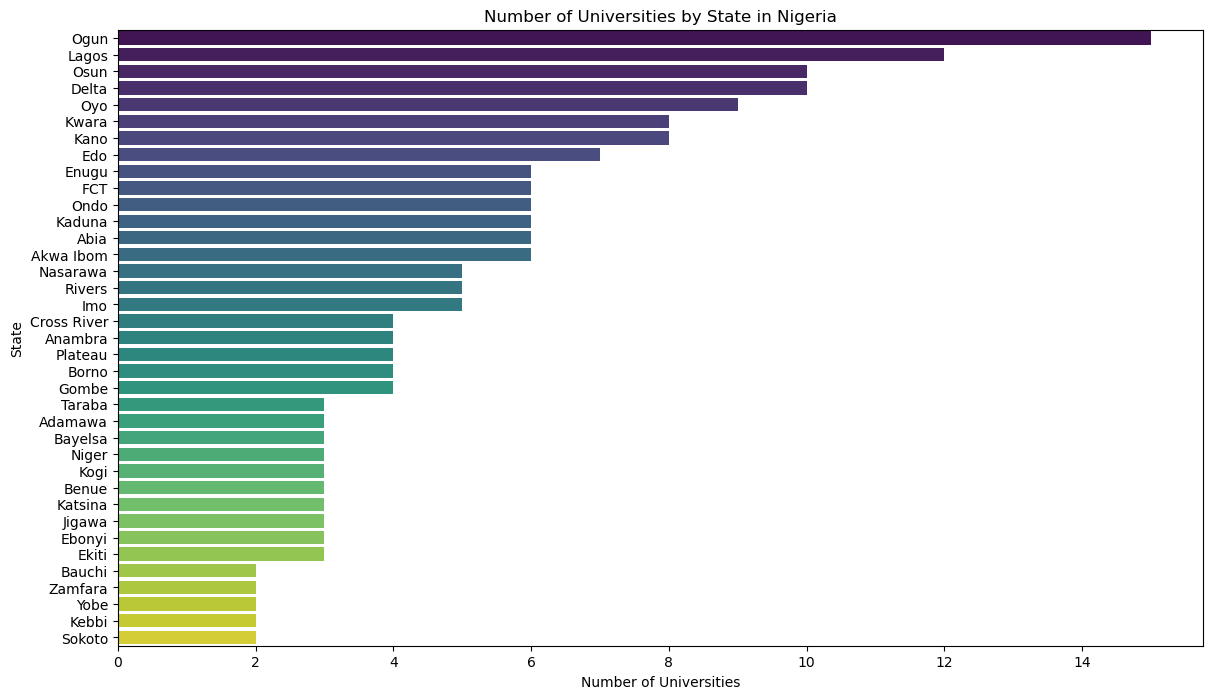

In [26]:
# Count the number of universities by state
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Number of Universities']

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Universities', y='State', data=state_counts, palette='viridis')
plt.title('Number of Universities by State in Nigeria')
plt.xlabel('Number of Universities')
plt.ylabel('State')
plt.show()

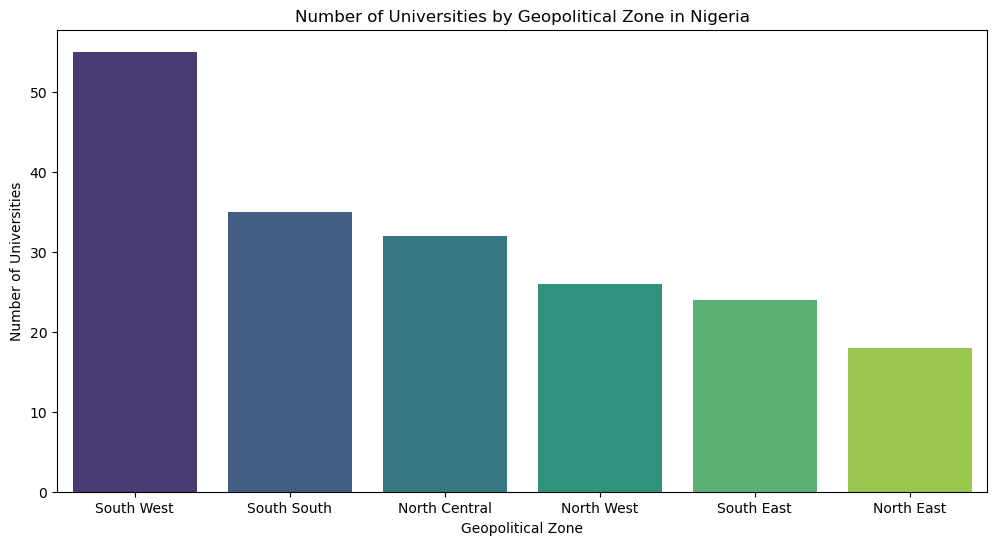

In [27]:
# Count the number of universities by geopolitical zone
zone_counts = df['Geopolitical Zone'].value_counts().reset_index()
zone_counts.columns = ['Geopolitical Zone', 'Number of Universities']

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Geopolitical Zone', y='Number of Universities', data=zone_counts, palette='viridis')
plt.title('Number of Universities by Geopolitical Zone in Nigeria')
plt.xlabel('Geopolitical Zone')
plt.ylabel('Number of Universities')
plt.show()

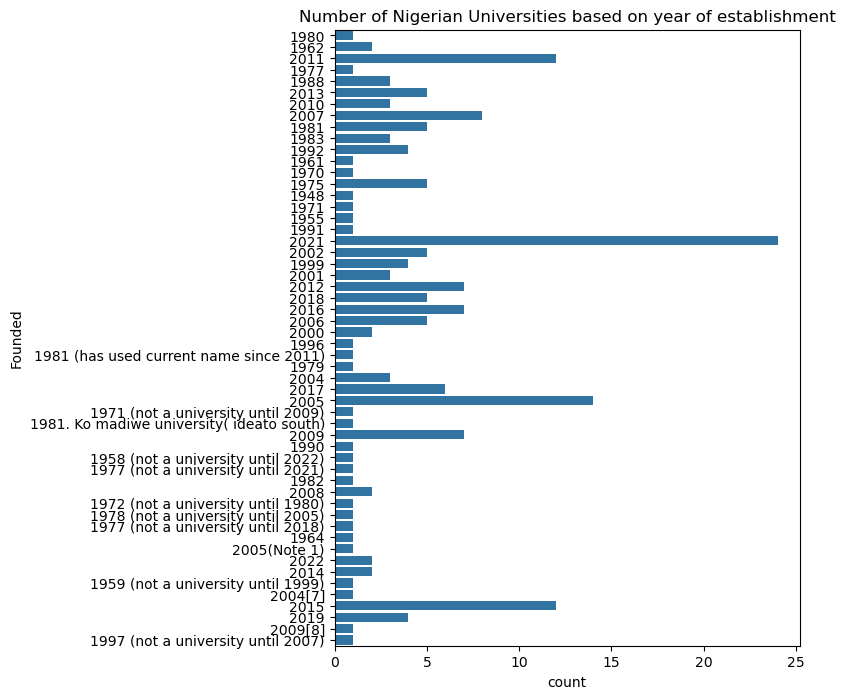

In [48]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [6,8])
sns.countplot(data = df, y = 'Founded', color = base_color)
plt.title('Number of Nigerian Universities based on year of establishment');

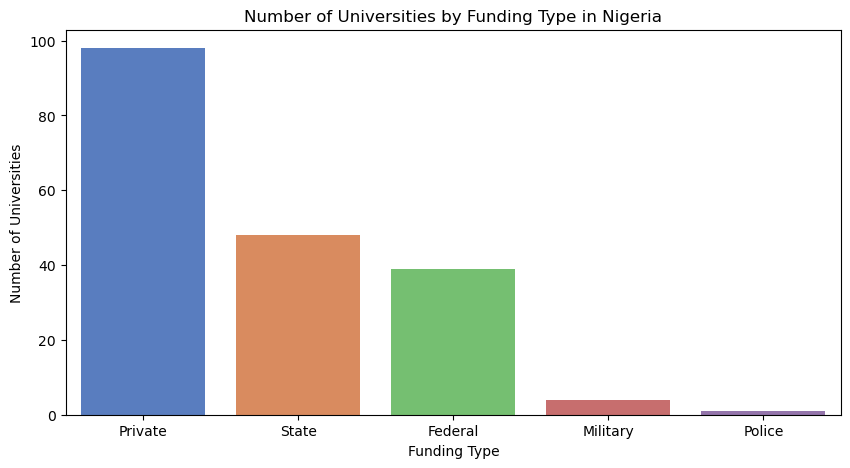

In [28]:
# Count the number of universities by funding type
funding_counts = df['Funding'].value_counts().reset_index()
funding_counts.columns = ['Funding', 'Number of Universities']

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x='Funding', y='Number of Universities', data=funding_counts, palette='muted')
plt.title('Number of Universities by Funding Type in Nigeria')
plt.xlabel('Funding Type')
plt.ylabel('Number of Universities')
plt.show()

In [95]:
# Count the number of universities by state
universities_by_state = df.groupby('State').size().reset_index(name='Number of Universities')

# Sort in ascending order based on the count of universities
universities_by_state_sorted = universities_by_state.sort_values(by='Number of Universities', ascending=False)

# Display the sorted result
print(universities_by_state_sorted)


          State  Number of Universities
27         Ogun                      15
24        Lagos                      12
29         Osun                      10
9         Delta                      10
30          Oyo                       9
23        Kwara                       8
19         Kano                       8
11          Edo                       7
0          Abia                       6
13        Enugu                       6
28         Ondo                       6
14          FCT                       6
18       Kaduna                       6
2     Akwa Ibom                       6
25     Nasarawa                       5
16          Imo                       5
32       Rivers                       5
15        Gombe                       4
8   Cross River                       4
31      Plateau                       4
3       Anambra                       4
7         Borno                       4
26        Niger                       3
34       Taraba                       3


In [91]:
# Count the number of universities by founding year
universities_by_founded_year = df.groupby('Founded').size().reset_index(name='Number of Universities')

# Sort in descending order based on the count of universities
universities_by_founded_year_sorted = universities_by_founded_year.sort_values(by='Number of Universities', ascending=False)

# Display the sorted result
print(universities_by_founded_year_sorted)


                                      Founded  Number of Universities
52                                       2021                      24
35                                       2005                      14
43                                       2011                      12
47                                       2015                      12
38                                       2007                       8
44                                       2012                       7
40                                       2009                       7
48                                       2016                       7
49                                       2017                       6
11                                       1975                       5
37                                       2006                       5
32                                       2002                       5
45                                       2013                       5
50                  

- The first university was created in 1948
- In 2021, 24 Universities were founded (The most), followed by 2005 with 14 universities
- In 2011, 12 universities were founded and also in 2015, 12 universities were founded
- 2007 had 8 universities, while 2012,2009 and 2016  7 universities respectively


In [83]:
# Group the DataFrame by 'Geopolitical Zone' and count the unique values in the 'Location' column
universities_by_zone = df.groupby('Geopolitical Zone')['Location'].nunique()

# sort from highest to lowest
universities_by_zone_sorted = universities_by_zone.sort_values(ascending=False)

print(universities_by_zone_sorted)

Geopolitical Zone
South West       40
South South      30
North Central    26
South East       18
North West       16
North East       13
Name: Location, dtype: int64


- The South West has the most universities at 40, followed by the South-South with 30
- The North West and North East have the fewest universities at 16 and 13 respectively
- There are 55 universities in the North and 88 universities in the South

In [42]:
# Count number of universities by funding type
funding_counts = df['Funding'].value_counts()

# Display the counts
print(funding_counts)

Funding
Private     98
State       48
Federal     39
Military     4
Police       1
Name: count, dtype: int64


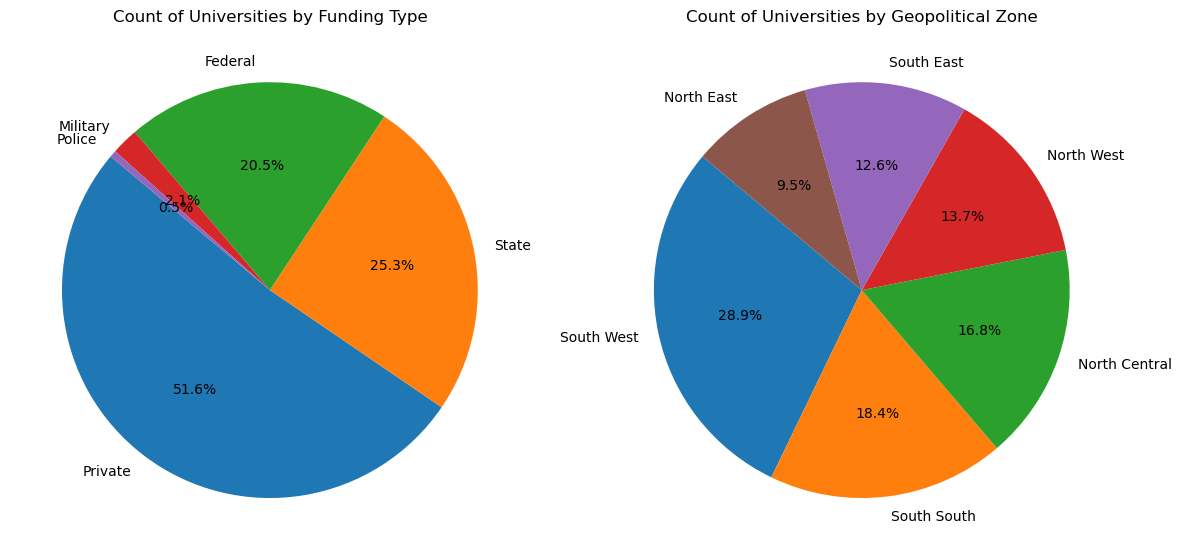

In [56]:
# Count number of universities by funding type
funding_counts = df['Funding'].value_counts()

# Count number of universities by geopolitical zone
zone_counts = df['Geopolitical Zone'].value_counts()

# Plot pie chart for funding count
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(funding_counts, labels=funding_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of Universities by Funding Type')

# Plot pie chart for zone count
plt.subplot(1, 2, 2)
plt.pie(zone_counts, labels=zone_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of Universities by Geopolitical Zone')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [87]:
# show the military and Police funded universities

df[(df['Funding'] == 'Military') | (df['Funding'] == 'Police')]

,Name,State,Abbreviation,Location,Funding,Founded,Geopolitical Zone
87,Nigeria Airforce University,Kaduna,AFIT,Kaduna,Military,1977 (not a university until 2018),North West
88,Nigeria Maritime University,Delta,NMU,Warri,Military,2018,South South
89,Nigeria Police Academy Wudil,Kano,POLAC,Wudil,Police,2013,North West
90,Nigerian Army University Biu,Borno,NUAB,Biu,Military,2018,North East
91,Nigerian Defence Academy,Kaduna,NDA,Kaduna,Military,1964,North West


In [72]:
# Show universities in Delta state that are also private

delta_private = df[(df['State'] == 'Delta') & (df['Funding'] == 'Private')]
delta_private

,Name,State,Abbreviation,Location,Funding,Founded,Geopolitical Zone
129,Edwin Clark University,Delta,ECU,Kiagbodo,Private,2015,South South
157,Michael and Cecilia Ibru University,Delta,MCIU,Agbara-Otor,Private,2015,South South
162,Novena University,Delta,-,Ogume,Private,2005,South South
186,Western Delta University,Delta,WDU,Oghara,Private,2007,South South


In [76]:
# Show universities founded in 2005
found_2005 = df[df['Founded'] ==  '2005']
found_2005

,Name,State,Abbreviation,Location,Funding,Founded,Geopolitical Zone
61,Ibrahim Badamasi Babangida University,Niger,IBBUL,Lapai,State,2005,North Central
77,Plateau State University,Plateau,PLASU,Bokkos,State,2005,North Central
99,Al-Hikmah University,Kwara,AHU,Ilorin,Private,2005,North Central
100,Al-Qalam University,Katsina,AUK,Katsina,Private,2005,North West
102,American University of Nigeria,Adamawa,AUN,Yola,Private,2005,North East
117,CETEP City University,Lagos,-,Yaba,Private,2005,South West
124,Crawford University,Ogun,-,Igbesa,Private,2005,South West
125,Crescent University,Ogun,-,Abeokuta,Private,2005,South West
128,ECWA Bingham University,Nasarawa,BU,New Karu,Private,2005,North Central
148,Kwararafa University,Taraba,-,Wukari,Private,2005,North East
